# PART I - Revisiting Machine Learning Case Study

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [250]:
data = pd.read_csv('learningSet.csv')
data.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [251]:
# Copy-pasting what we already did in the curriculum
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
5,MAILCODE,0.000000
6,PVASTATE,0.000000
7,DOB,0.000000
8,NOEXCH,0.000000
9,RECINHSE,0.000000


In [252]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
29,MBGARDEN,0.553955
30,MBBOOKS,0.553955
31,MBCOLECT,0.554584
32,MAGFAML,0.553955
33,MAGFEM,0.553955


In [253]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
31     MBCOLECT
32      MAGFAML
33       MAGFEM
34      MAGMALE
35     PUBGARDN
36     PUBCULIN
37      PUBHLTH
38     PUBDOITY
39     PUBNEWFN
40     PUBPHOTO
41       PUBOPP
53      WEALTH2
364     ADATE_5
369    ADATE_10
372    ADATE_13
374    ADATE_15
376    ADATE_17
378    ADATE_19
379    ADATE_20
380    ADATE_21
381    ADATE_22
382    ADATE_23
383    ADATE_24
412     RDATE_3
413     RDATE_4
414     RDATE_5
415     RDATE_6
416     RDATE_7
417     RDATE_8
418     RDATE_9
419    RDATE_10
420    RDATE_11
421    RDATE_12
422    RDATE_13
423    RDATE_14
424    RDATE_15
425    RDATE_16
426    RDATE_17
427    RDATE_18
428    RDATE_19
429    RDATE_20
430    RDATE_21
431    RDATE_22
432    RDATE_23
433    RDATE_24
434     RAMNT_3
435     RAMNT_4
436     RAMNT_5
437     RAMNT_6
438     RAMNT_7
439     RAMNT_8
440     RAMNT_9
441    RAMNT_10
442    RAMNT_11
443    RAMNT_12
444    RAMNT_13
445    RAMNT_14
446    R

In [254]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [255]:
def nulldroppoff(df, perc = 0.25):
        nulls_percent_df = pd.DataFrame(df.isna().sum()/len(df)).reset_index()
        nulls_percent_df.columns = ['column_name', 'nulls_percentage']
        columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>perc]
        drop_columns_list = list(columns_above_threshold['column_name'])
        return drop_columns_list

In [256]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [257]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [258]:
drop_columns_list = nulldroppoff(data)

In [259]:
drop_columns_list = [col for col in drop_columns_list if col not in ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']]

In [260]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,8

In [261]:
# creating the dataframe of categorical variables
categorical = data.select_dtypes([object])

In [262]:
pd.set_option('display.max_rows', None)
categorical.isna().sum()/categorical.shape[0]

OSOURCE     0.009726
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
PVASTATE    0.984719
NOEXCH      0.000073
RECINHSE    0.929747
RECP3       0.978860
RECPGVG     0.998805
RECSWEEP    0.983052
MDMAUD      0.000000
DOMAIN      0.024274
CLUSTER     0.024274
AGEFLAG     0.309689
HOMEOWNR    0.232969
CHILD03     0.987989
CHILD07     0.983587
CHILD12     0.981019
CHILD18     0.970161
GENDER      0.030992
DATASRCE    0.223033
SOLP3       0.998113
SOLIH       0.935019
MAJOR       0.996919
GEOCODE     0.840230
COLLECT1    0.945479
VETERANS    0.890727
BIBLE       0.907024
CATLG       0.917568
HOMEE       0.990703
PETS        0.849851
CDPLAY      0.871568
STEREO      0.865908
PCOWNERS    0.890150
PHOTO       0.949839
CRAFTS      0.914308
FISHER      0.925271
GARDENIN    0.859535
BOATS       0.978745
WALKER      0.889940
KIDSTUFF    0.983901
CARDS       0.989089
PLATES      0.994131
LIFESRC     0.566302
PEPSTRFL    0.525542
RFA_2       0.000000
RFA_3       0.020438
RFA_4       0

In [263]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

/var/folders/tk/75w8q4_s16n1_zv4jdmdlwhh0000gn/T/ipykernel_34368/3203227409.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['STATE'] = list(map(clean_state, categorical['STATE']))


In [264]:
data['OSOURCE'].value_counts(dropna = False)

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
ARG    2409
L01    2270
HOS    2192
AMB    2184
FRC    2164
DNA    1846
LIS    1604
AGR    1594
HCC    1590
MCC    1558
DRK    1379
HHH    1367
STR    1321
WKB    1281
L04    1250
L02    1233
ESN    1158
ASC    1100
CNT    1061
CWR     998
DCD     958
LHJ     957
NaN     928
HAN     839
SGI     810
PV3     805
RPH     778
SSS     769
NAS     747
IMA     693
USB     689
MCO     593
L21     572
DUR     564
APP     562
BOA     550
GRI     547
UCA     540
CRG     494
NWN     490
SPN     488
DEL     463
L16     459
CFI     420
AGS     412
RMG     412
PBL     407
STV     404
ENQ     402
MAT     390
ALZ     364
GUR     352
L15     347
PCL     341
FOR     340
GPS     339
SUN     333
CHT     330
BRY     324
HAM     322
ADD     320
SYC     308
AVN     300
WRG     290
LKE     289
OMH     288
TX2     288
MON     288
WIG     283
TVH     280
LEO     279
HOW     277
DON     273
D02     268
ANT     265
COS     264
FCR     258
KEN     252
COK 

In [265]:
# Adding osource and zip code to drop_list (to drop them later)
drop_list = ['OSOURCE','ZIP']

In [266]:
# Identifying columns with over 85% missing values

nulls_percent_categorical = pd.DataFrame(categorical.isna().sum()/len(categorical)).reset_index()
nulls_percent_categorical.columns = ['column_name', 'nulls_percentage']
nulls_percent_categorical

,column_name,nulls_percentage
0,OSOURCE,0.009726
1,STATE,0.000000
2,ZIP,0.000000
3,MAILCODE,0.000000
4,PVASTATE,0.984719
5,NOEXCH,0.000073
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052


In [267]:
nulls_percent_categorical[nulls_percent_categorical['nulls_percentage']>=0.85]

,column_name,nulls_percentage
4,PVASTATE,0.984719
6,RECINHSE,0.929747
7,RECP3,0.978860
8,RECPGVG,0.998805
9,RECSWEEP,0.983052
15,CHILD03,0.987989
16,CHILD07,0.983587
17,CHILD12,0.981019
18,CHILD18,0.970161
21,SOLP3,0.998113


In [268]:
categorical_above_threshold = nulls_percent_categorical[nulls_percent_categorical['nulls_percentage']>=0.85]
categorical_above_threshold['column_name']

4     PVASTATE
6     RECINHSE
7        RECP3
8      RECPGVG
9     RECSWEEP
15     CHILD03
16     CHILD07
17     CHILD12
18     CHILD18
21       SOLP3
22       SOLIH
23       MAJOR
25    COLLECT1
26    VETERANS
27       BIBLE
28       CATLG
29       HOMEE
31      CDPLAY
32      STEREO
33    PCOWNERS
34       PHOTO
35      CRAFTS
36      FISHER
37    GARDENIN
38       BOATS
39      WALKER
40    KIDSTUFF
41       CARDS
42      PLATES
Name: column_name, dtype: object

In [269]:
drop_cat_list = list(categorical_above_threshold['column_name'])
print(drop_cat_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']


In [270]:
for i in range(len(drop_list)) :
    drop_cat_list.append(drop_list[i])

In [271]:
print(drop_cat_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'SOLP3', 'SOLIH', 'MAJOR', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'OSOURCE', 'ZIP']


In [272]:
# Removing those columns from the dataframe :
categorical = categorical.drop(drop_cat_list, axis=1)

In [273]:
categorical.isna().sum()/categorical.shape[0]

STATE       0.000000
MAILCODE    0.000000
NOEXCH      0.000073
MDMAUD      0.000000
DOMAIN      0.024274
CLUSTER     0.024274
AGEFLAG     0.309689
HOMEOWNR    0.232969
GENDER      0.030992
DATASRCE    0.223033
GEOCODE     0.840230
PETS        0.849851
LIFESRC     0.566302
PEPSTRFL    0.525542
RFA_2       0.000000
RFA_3       0.020438
RFA_4       0.024232
RFA_5       0.352052
RFA_6       0.037280
RFA_7       0.093007
RFA_8       0.036798
RFA_9       0.117857
RFA_10      0.343227
RFA_11      0.109232
RFA_12      0.093521
RFA_13      0.421530
RFA_14      0.197742
RFA_15      0.686255
RFA_16      0.213988
RFA_17      0.289796
RFA_18      0.222855
RFA_19      0.256697
RFA_20      0.526139
RFA_21      0.369052
RFA_22      0.268813
RFA_23      0.589800
RFA_24      0.387509
RFA_2R      0.000000
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
dtype: float64

In [274]:
# Handling GENDER column
categorical['GENDER'].value_counts(dropna = False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [275]:
categorical['GENDER'] = categorical['GENDER'].fillna('F') # we replace NaN by the most frequent value

In [276]:
def clean_gender(x):
    if (x not in ['F', 'M']) :
        return 'other'
    else :
        return x
    
categorical['GENDER'] = list(map(clean_gender, categorical['GENDER']))

In [277]:
categorical['GENDER'].value_counts(dropna = False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

# PART II - Feature Engineering

In [278]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9510.0,9508.0,9507.0,9506.0,9504.0,9503.0,9502.0,9501.0,9411.0,9411.0,9410.0,9409.0,9407.0,9406.0,27,9702,74,6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,NaN,NaN,9507.0,9505.0,9505.0,9503.0,NaN,NaN,NaN,NaN,NaN,9408.0,9406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,10.0,11.0,11.0,11.0,NaN,NaN,NaN,NaN,NaN,11.0,9.0,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,1.0,6.0,9.0,16,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,4

In [279]:
num_col_to_drop_adate = [col for col in numerical.columns if 'ADATE_' in col]

In [280]:
numerical.drop(num_col_to_drop_adate, axis = 1, inplace = True)

In [281]:
numerical.shape

(95412, 382)

In [282]:
# Check for null values in the numerical columns
numerical.isna().sum()/numerical.shape[0]

ODATEDW     0.000000
TCODE       0.000000
DOB         0.000000
AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
HIT         0.000000
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
PUBGARDN    0.553955
PUBCULIN    0.553955
PUBHLTH     0.553955
PUBDOITY    0.553955
PUBNEWFN    0.553955
PUBPHOTO    0.553955
PUBOPP      0.553955
MALEMILI    0.000000
MALEVET     0.000000
VIETVETS    0.000000
WWIIVETS    0.000000
LOCALGOV    0.000000
STATEGOV    0.000000
FEDGOV      0.000000
WEALTH2     0.459303
POP901      0.000000
POP902      0.000000
POP903      0.000000
POP90C1     0.000000
POP90C2     0.000000
POP90C3     0.000000
POP90C4     0.000000
POP90C5     0.000000
ETH1        0.000000
ETH2        0.000000
ETH3        0.000000
ETH4        0.000000
ETH5        0.000000
ETH6        0.000000
ETH7        0.000000
ETH8        0.000000
ETH9        0.000000
ETH10       0

In [283]:
numerical['INCOME'] = numerical['INCOME'].astype('object')

In [284]:
m = numerical['INCOME'].mode()[0]
numerical['INCOME'] = numerical['INCOME'].fillna(m)

In [285]:
numerical['AGE'] = numerical['AGE'].fillna(np.median(numerical['AGE']))

In [286]:
numerical.isna().sum()/numerical.shape[0]

ODATEDW     0.000000
TCODE       0.000000
DOB         0.000000
AGE         0.248030
NUMCHLD     0.870184
INCOME      0.000000
WEALTH1     0.468830
HIT         0.000000
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
PUBGARDN    0.553955
PUBCULIN    0.553955
PUBHLTH     0.553955
PUBDOITY    0.553955
PUBNEWFN    0.553955
PUBPHOTO    0.553955
PUBOPP      0.553955
MALEMILI    0.000000
MALEVET     0.000000
VIETVETS    0.000000
WWIIVETS    0.000000
LOCALGOV    0.000000
STATEGOV    0.000000
FEDGOV      0.000000
WEALTH2     0.459303
POP901      0.000000
POP902      0.000000
POP903      0.000000
POP90C1     0.000000
POP90C2     0.000000
POP90C3     0.000000
POP90C4     0.000000
POP90C5     0.000000
ETH1        0.000000
ETH2        0.000000
ETH3        0.000000
ETH4        0.000000
ETH5        0.000000
ETH6        0.000000
ETH7        0.000000
ETH8        0.000000
ETH9        0.000000
ETH10       0

In [287]:
# cleaning geocode2
categorical['GEOCODE2'].value_counts(dropna = False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [288]:
# Let's drop the rows with NA's
ml = list(categorical[categorical['GEOCODE2'].notna()].index)
categorical = categorical.loc[ml,:]
numerical = numerical.loc[ml,:]

In [289]:
categorical['GEOCODE2'].value_counts(dropna = False)

A    34484
B    28505
D    16580
C    15524
Name: GEOCODE2, dtype: int64

In [290]:
numerical['WEALTH1'].value_counts(dropna = False)

NaN    44475
9.0     7578
8.0     6784
7.0     6192
6.0     5816
5.0     5272
4.0     4807
3.0     4230
2.0     4080
1.0     3450
0.0     2409
Name: WEALTH1, dtype: int64

In [291]:
# Let's drop the rows with NA's
ml2 = list(numerical[numerical['WEALTH1'].notna()].index)
categorical = categorical.loc[ml2,:]
numerical = numerical.loc[ml2,:]

In [292]:
# ADI
numerical['ADI'].value_counts(dropna = False)

# no NA's

13.0     3345
51.0     2628
65.0     1910
57.0     1537
197.0    1284
105.0    1281
109.0    1160
107.0    1094
131.0    1067
201.0    1030
75.0     1011
329.0     996
127.0     964
241.0     894
67.0      859
275.0     802
233.0     794
83.0      743
15.0      736
111.0     711
351.0     671
157.0     615
129.0     614
279.0     598
59.0      582
213.0     519
181.0     497
281.0     475
271.0     449
577.0     416
263.0     403
63.0      398
209.0     397
335.0     392
179.0     381
367.0     372
291.0     368
315.0     365
269.0     338
307.0     332
245.0     325
221.0     322
71.0      305
215.0     303
203.0     299
383.0     298
77.0      294
455.0     291
301.0     277
303.0     266
277.0     263
0.0       260
113.0     258
337.0     251
53.0      250
243.0     249
133.0     247
319.0     244
177.0     231
175.0     222
173.0     221
207.0     215
361.0     211
451.0     211
17.0      208
187.0     207
199.0     206
211.0     202
61.0      200
427.0     190
185.0     189
115.0 

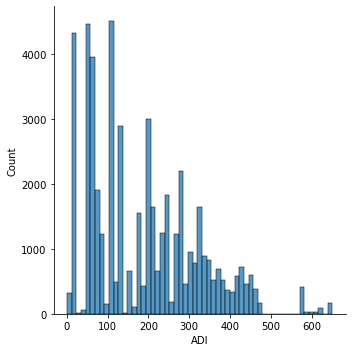

In [293]:
# Let's check the distribution :
sns.displot(numerical['ADI'])
plt.show()

In [294]:
# We could delete rows for which ADI > 500 (seems to be outliers)
ml3 = list(numerical[numerical['ADI'] < 500].index)
categorical = categorical.loc[ml3,:]
numerical = numerical.loc[ml3,:]

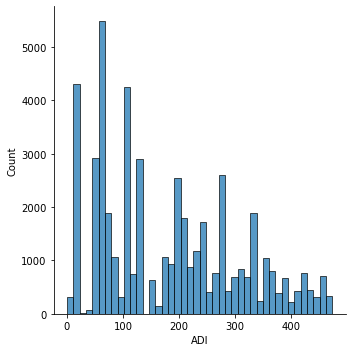

In [295]:
sns.displot(numerical['ADI'])
plt.show()

In [296]:
# DMA
numerical['DMA'].value_counts(dropna = False)

803.0    3345
602.0    2630
807.0    1910
505.0    1538
524.0    1285
819.0    1265
623.0    1140
613.0    1070
539.0    1066
618.0    1030
609.0    1012
534.0     996
528.0     964
751.0     891
862.0     859
753.0     802
820.0     767
527.0     749
825.0     736
617.0     711
560.0     664
548.0     614
616.0     610
517.0     599
563.0     582
567.0     519
659.0     494
518.0     475
641.0     432
650.0     405
561.0     389
513.0     383
640.0     381
529.0     381
790.0     376
770.0     371
658.0     341
671.0     338
678.0     332
622.0     325
630.0     318
866.0     305
557.0     299
686.0     298
635.0     295
839.0     291
648.0     284
652.0     276
669.0     270
881.0     267
789.0     263
679.0     256
588.0     250
752.0     249
571.0     248
693.0     248
682.0     228
540.0     225
675.0     220
649.0     220
637.0     218
575.0     216
546.0     211
632.0     210
855.0     208
744.0     207
541.0     206
551.0     200
801.0     193
619.0     192
705.0     186
716.0 

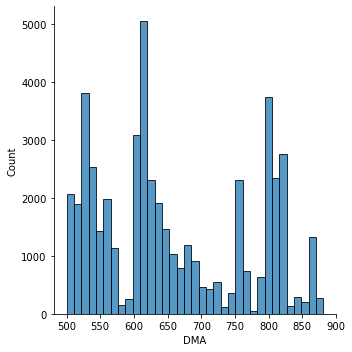

In [297]:
sns.displot(numerical['DMA'])
plt.show()

In [298]:
numerical[numerical['DMA'].isna() == True]
# NO NaN

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2


In [299]:
# MSA
numerical['MSA'].value_counts(dropna = False)

0.0       9611
1600.0    2307
4480.0    2185
2160.0    1381
520.0     1108
7040.0     887
3360.0     873
5120.0     777
8280.0     739
7320.0     736
1920.0     721
7600.0     707
5775.0     692
6200.0     679
2080.0     606
5945.0     575
3760.0     512
6440.0     496
2680.0     492
7360.0     487
5960.0     476
7400.0     474
5080.0     473
3480.0     461
5000.0     443
8960.0     419
1520.0     413
6920.0     391
3120.0     388
7240.0     375
6780.0     370
6640.0     365
2800.0     337
3600.0     331
3000.0     329
4120.0     325
5360.0     312
5880.0     305
4920.0     302
640.0      283
4520.0     283
3160.0     265
5560.0     251
7160.0     250
1000.0     231
8520.0     231
8560.0     228
2020.0     207
3840.0     207
8735.0     205
2960.0     202
440.0      194
200.0      193
4900.0     184
5920.0     183
2840.0     183
8200.0     177
3320.0     170
1720.0     170
7500.0     166
760.0      158
2700.0     158
6120.0     154
8720.0     153
680.0      150
1760.0     147
9040.0    

In [300]:
numerical[numerical['MSA'].isna() == True]
# NO NAN's

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2


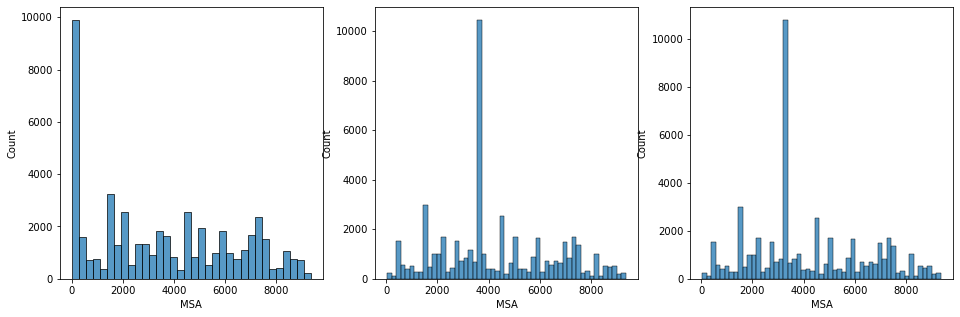

In [302]:
# We could replace the 0 values by the mean or median
fig, ax = plt.subplots(1,3,figsize=(16,5))
sns.histplot(numerical['MSA'], ax = ax[0])
sns.histplot(numerical["MSA"].replace(0.0, np.mean(numerical['MSA'])), ax = ax[1])
sns.histplot(numerical['MSA'].replace(0.0, np.median(numerical['MSA'])),ax = ax[2])
plt.show()

In [303]:
# Let's drop rows with value equal to 0
ml4 = list(numerical[numerical['MSA'] != 0].index)
categorical = categorical.loc[ml4,:]
numerical = numerical.loc[ml4,:]

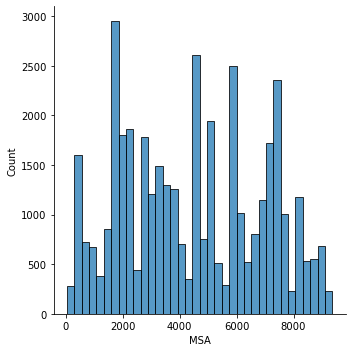

In [304]:
sns.displot(numerical['MSA'])
plt.show()